In [1]:
# Imports
import os, sys, types
import pathlib
from importlib import reload
import pickle 

import numpy as np
import math
import scipy
import scipy.linalg
from sympy.physics.quantum import TensorProduct, tensor_product_simp
from sympy.physics.quantum.dagger import Dagger

In [2]:
import scipy.optimize

In [3]:
from functools import partial

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [7]:
# Local package imports
# Update this with setup & develop later
PROJECT_PATH = str(pathlib.Path().resolve().parent)
sys.path.append(PROJECT_PATH)

In [8]:
# Cool reloading
# Reference: https://stackoverflow.com/questions/28101895/reloading-packages-and-their-submodules-recursively-in-python

def reload_package(package):
    assert(hasattr(package, "__package__"))
    fn = package.__file__
    fn_dir = os.path.dirname(fn) + os.sep
    module_visit = {fn}
    del fn

    def reload_recursive_ex(module):
        reload(module)

        for module_child in vars(module).values():
            if isinstance(module_child, types.ModuleType):
                fn_child = getattr(module_child, "__file__", None)
                if (fn_child is not None) and fn_child.startswith(fn_dir):
                    if fn_child not in module_visit:
                        # print("reloading:", fn_child, "from", module)
                        module_visit.add(fn_child)
                        reload_recursive_ex(module_child)

    return reload_recursive_ex(package)

In [11]:
import hiddenbcd
from hiddenbcd.queries import repeated_search_numerical_length

# Queries

In this section, we show how queries can be specified through phase sequences and their evaluation.

In [12]:
# Pauli operators
si = np.array([ [1, 0], [0, 1] ])
sx = np.array([ [0, 1], [1, 0] ])
sy = np.array([ [0, -1j], [1j, 0] ])
sz = np.array([ [1, 0], [0, -1] ])
had = (1/np.sqrt(2))*np.array([ [1, 1], [1, -1] ])

# Kron
def kron(a, b):
    return np.matrix(scipy.linalg.kron(a, b))

In [13]:
# Helper functions
def Rx(phi):
    return np.cos(phi)*si + 1j*np.sin(phi)*sx

def Ry(phi):
    return np.cos(phi)*si + 1j*np.sin(phi)*sy

def Rz(phi):
    return np.cos(phi)*si + 1j*np.sin(phi)*sz

def print_clean(x):
    with np.printoptions(suppress=True):
        print(x)

### Length-4 example

U_simple

In [14]:
# Proposed solution
psi_W = np.pi/4
phi = np.zeros(5)

In [16]:
theta_V = 0
U_simple, rho = hiddenbcd.queries.phase_sequence(theta_V, phi, psi_W, 4, FLAG_verbose=False)

In [17]:
print_clean(U_simple)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.-0.j]]


In [18]:
print_clean(rho)

[[0.5+0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]]


In [19]:
theta_V = np.arccos(np.sqrt(2 - np.sqrt(2)))
U_simple, rho = hiddenbcd.queries.phase_sequence(theta_V, phi, psi_W, 4, FLAG_verbose=False)

In [20]:
print_clean(U_simple)

[[-0.-1.j  0.+0.j  0.-0.j  0.+0.j]
 [ 0.+0.j -0.+1.j  0.+0.j -0.-0.j]
 [ 0.+0.j  0.+0.j  0.-1.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j  0.+1.j]]


In [21]:
print_clean(rho)

[[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-0. -0.j  0. +0.j  0.5-0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]]


U_sqsp

In [22]:
# Proposed solution
psi_W = np.pi/4
phi = np.array([np.pi/4,0,0,0,np.pi/4])

In [23]:
theta_V = 0
U_sqsp, rho = hiddenbcd.queries.phase_sequence(theta_V, phi, psi_W, 4)

In [24]:
print_clean(U_sqsp)

[[ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j  0.-1.j]
 [ 0.+0.j  0.+0.j  0.-1.j -0.-0.j]]


In [25]:
print_clean(rho)

[[ 0. +0.j  0. -0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0.5+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j -0. -0.j]
 [ 0. +0.j  0. +0.j -0. +0.j  0.5+0.j]]


In [26]:
hiddenbcd.queries.probability_target(rho)

array([3.47148897e-17, 1.00000000e+00])

In [27]:
theta_V = np.arccos(np.sqrt(2 - np.sqrt(2)))
U_sqsp, rho = hiddenbcd.queries.phase_sequence(theta_V, phi, psi_W, 4, FLAG_verbose=False)

In [28]:
print_clean(U_sqsp)

[[ 0.-1.j -0.-0.j  0.+0.j  0.-0.j]
 [ 0.-0.j  0.+1.j  0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j -0.-1.j  0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.+1.j]]


In [29]:
print_clean(rho)

[[ 0.5-0.j  0. +0.j  0. -0.j  0. +0.j]
 [ 0. +0.j -0. -0.j -0. +0.j  0. +0.j]
 [ 0. +0.j -0. -0.j  0.5-0.j -0. +0.j]
 [ 0. -0.j -0. -0.j -0. -0.j -0. +0.j]]


In [30]:
hiddenbcd.queries.probability_target(rho)

array([ 1.0000000e+00, -4.4408921e-16])

# Numerical Optimization of Queries (Phase Sequences)

Idea: Consider that we get state $|0\rangle$ for $\theta_V = \theta_1$ and $|1\rangle$ for $\theta_V = 0$. Lets declare success for two instances: $p(0|\theta_V=\theta_1) - p(1|\theta_V=0) > 1/3$ (actually enough for it to be $\delta$, and then we can say that with enough repetitions, it succeeds with high probability) and $p(0|\theta_V=\theta_1) - p(0|\theta_V=0) \approx 1$.

The optimization problem is then
\begin{equation}
\arg \max_{\phi} p(0|\theta_V=\theta_1;\phi) - p(0|\theta_V=0;\phi)
\end{equation}

## Simple example

In [37]:
# Suppose we want to discriminate {alpha,0} using a phase sequence of length 4
alpha = np.arccos(np.sqrt(2 - np.sqrt(2)))
K = 4

In [38]:
# Initialization
phi_init = np.zeros(K+2)
phi_init[0] = np.random.randn() # psi_W
phi_init[1] = np.pi/4 # phi_0
phi_init[K+1] = np.pi/4 # phi_K

# Starting cost in this case
hiddenbcd.queries.cost_function(phi_init, alpha, K)

0.5939621169191641

In [39]:
# Optimize phase sequence to maximize probability of success
phi_sol = hiddenbcd.queries.quasi_newton_solve(phi_init, alpha, K)
print(phi_sol)

[ 7.87337712e-01  7.85398159e-01  1.00475413e-09 -4.78547180e-09
  4.23857677e-10  7.85398165e-01]


In [40]:
hiddenbcd.queries.cost_function(phi_sol, alpha, K)

2.1070003540428427e-09

In [48]:
# How does it compare against a phase sequence known to succeed?
K = 4
psi_W = np.pi/4
phi = np.array([np.pi/4,0,0,0,np.pi/4])

angle_vec = np.insert(phi, 0, psi_W, axis=0)
print(angle_vec)

cost_opt = hiddenbcd.queries.cost_function(angle_vec, alpha, K)
print(cost_opt)

[0.78539816 0.78539816 0.         0.         0.         0.78539816]
1.9721522630525295e-31


We could have obtained a solution with beter approximation error if we reduce the tolerance of the optimizer.

In [42]:
# Let us repeat the above but with a shorter phase sequence
alpha = np.arccos(np.sqrt(2 - np.sqrt(2)))
K = 3

phi_init = np.zeros(K+2)
phi_init[0] = np.random.randn() # psi_W
phi_init[1] = np.pi/4 # phi_0
phi_init[K+1] = np.pi/4 # phi_K

phi_sol = hiddenbcd.queries.quasi_newton_solve(phi_init, alpha, K)

In [43]:
phi_sol

array([ 1.05917840e+00,  7.85398158e-01,  2.88391894e-10, -4.51525799e-10,
        7.85398159e-01])

In [44]:
# cost in this case
hiddenbcd.queries.cost_function(phi_sol, alpha, K)

0.020330217153666327

## Visualize resulting unitaries

In [50]:
def plot_heat_map_unitary(U, tau=1e-3):
    U_thresh = U.copy()
    U_thresh[np.abs(U_thresh) < tau] = 0
    
    colormap = sns.color_palette("vlag", as_cmap=True)
    ax = sns.heatmap(np.real(U_thresh), linewidth=0.5, cmap=colormap)
    plt.show()
    
    ax = sns.heatmap(np.imag(U_thresh), linewidth=0.5, cmap=colormap)
    plt.show()

In [51]:
alpha = np.arccos(np.sqrt(2 - np.sqrt(2)))
delta = 0.05
n_reps = 5

K, phi_sol = repeated_search_numerical_length(theta_1, delta, n_reps)

In [52]:
phi_sol

array([ 1.05917655e+00,  7.85395283e-01, -3.92098224e-06,  7.13232565e-06,
        7.85387088e-01])

In [53]:
psi_W = phi_sol[0]
phi = phi_sol[1:]

# theta_V = 0
U0, rho0 = hiddenbcd.queries.phase_sequence(0.0, phi, psi_W, K)
prob_theta0 = hiddenbcd.queries.probability_target(rho0)
p_theta0 = prob_theta0[0]

# theta_V = alpha
U1, rho1 = hiddenbcd.queries.phase_sequence(alpha, phi, psi_W, K)
prob_theta1 = hiddenbcd.queries.probability_target(rho1)
p_theta1 = prob_theta1[0]

In [54]:
p_theta0

0.0006454562204711897

In [55]:
p_theta1

0.858061385516458

In [56]:
print_clean(U0)

[[ 0.00001074+0.j          0.        +1.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +1.j          0.00001074+0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.00001552-0.03592927j
   0.00000993-0.99935434j]
 [ 0.        +0.j          0.        +0.j         -0.00000993-0.99935434j
  -0.00001552+0.03592927j]]


In [57]:
print_clean(U1)

[[ 0.00000136-0.82353807j  0.00000087+0.30296076j -0.41817363+0.00000477j
  -0.23479915-0.00000264j]
 [-0.00000087+0.30296076j  0.00000136+0.82353807j -0.23479915+0.00000264j
   0.41817363+0.00000477j]
 [-0.40946747-0.00000727j  0.24967222+0.00000048j -0.00000009-0.8338915j
   0.00001098-0.27317604j]
 [ 0.24967222-0.00000048j  0.40946747-0.00000727j -0.00001098-0.27317604j
  -0.00000009+0.8338915j ]]


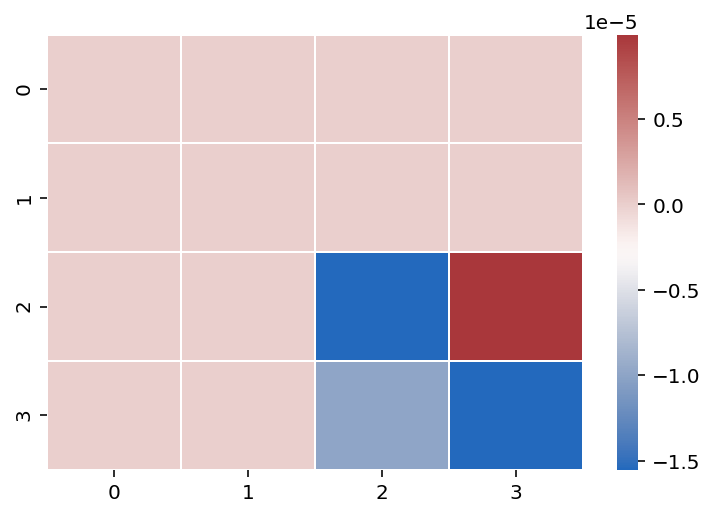

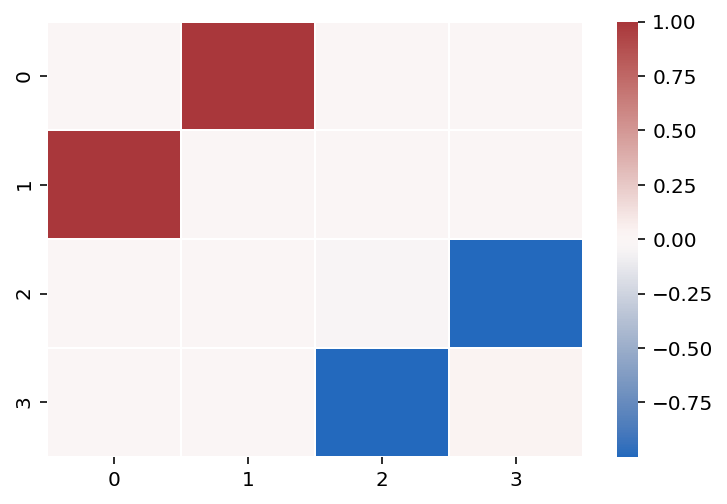

In [58]:
plot_heat_map_unitary(U0)

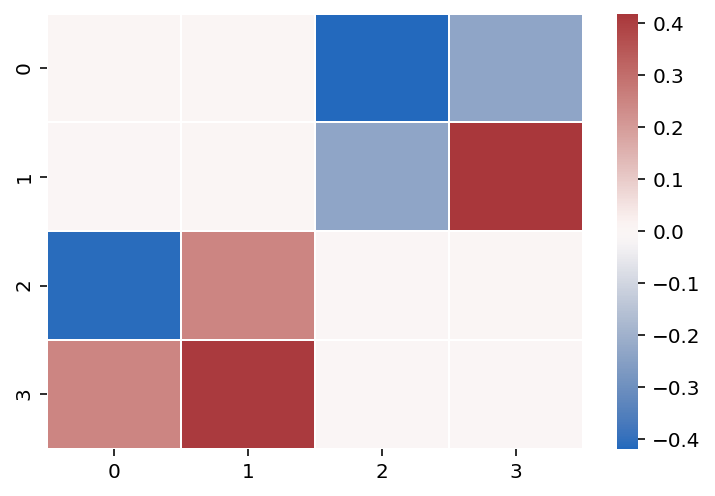

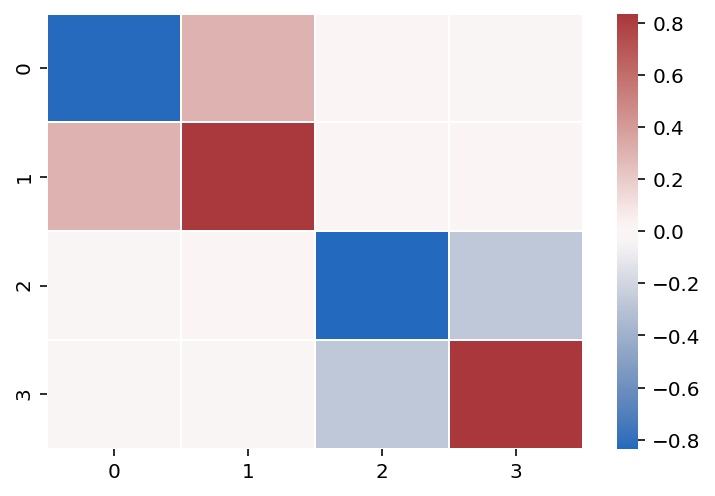

In [59]:
plot_heat_map_unitary(U1)